In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow
import keras
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as layers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from scipy import stats
import json

2023-05-02 19:19:33.314701: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import cactas as C

In [4]:
asymp_img = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_cropped_no_norm.npy')
symp_img = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_cropped_no_norm.npy')
asymp_label = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_cropped_labels_no_norm.npy')
symp_label = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_cropped_labels_no_norm.npy')

In [5]:
images = np.concatenate((asymp_img, symp_img, asymp_label, symp_label))
labels = np.array([0]*len(asymp_img) + [0]*len(asymp_label) + [1]*len(symp_img) + [1]*len(symp_label))

In [ ]:
#images = np.concatenate((asymp_img, asymp_label, symp_img, symp_label))

In [6]:
train_f1 = []
test_f1 = []
train_acc = []
test_acc = []
for i in range(10):
    X, y = shuffle(images, labels, random_state=0)
    X_train, X_val, y_train, y_val = C.Util.split_3(X, y, val_size=0.20)
    #X_train, X_val, y_train, y_val = C.Util.split_2(X, y, val_size=0.10)
    
    X_train_raveled = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
    X_val_raveled = X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2])

    rf = RandomForestClassifier(n_estimators=100)
    fitted = rf.fit(X_train_raveled, y_train)
    y_pred = rf.predict(X_val_raveled)
    
    train_accuracy = sklearn.metrics.accuracy_score(y_val, y_pred)
    f1 = sklearn.metrics.f1_score(y_val, y_pred)
    print('run', i, 'acc', train_accuracy, 'f1', f1)
    train_acc.append(train_accuracy)
    train_f1.append(f1)
    
    asymp_img_test = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_cropped.npy')
    symp_img_test = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_cropped.npy')
    asymp_label_test = np.load('/raid/mpsych/CACTAS/DATA/ESUS/asymp_labels_cropped.npy')
    symp_label_test = np.load('/raid/mpsych/CACTAS/DATA/ESUS/symp_labels_cropped.npy')

    labels_test = np.array([0]*len(asymp_img_test) + [0]*len(asymp_label_test) + [1]*len(symp_img_test) + [1]*len(symp_label_test))
    images_test = np.concatenate((asymp_img_test, symp_img_test, asymp_label_test, symp_label_test))
    
    X_test, y_test = shuffle(images_test, labels_test, random_state=0)
    
    X_test_raveled = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

    y_pred = rf.predict(X_test_raveled)
    
    test_accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
    c_test_f1 = sklearn.metrics.f1_score(y_test, y_pred)
    print('test run', i, 'acc', test_accuracy, 'f1', c_test_f1)
    test_acc.append(test_accuracy)
    test_f1.append(c_test_f1)

run 0 acc 0.9952718676122931 f1 0.995433789954338
test run 0 acc 0.8680310515172901 f1 0.882537688442211
run 1 acc 0.9952718676122931 f1 0.995433789954338
test run 1 acc 0.8853211009174312 f1 0.8963317384370016
run 2 acc 0.9952718676122931 f1 0.995433789954338
test run 2 acc 0.8793225123500353 f1 0.891497461928934
run 3 acc 0.9952718676122931 f1 0.995433789954338
test run 3 acc 0.8719124911785462 f1 0.8855972265994326
run 4 acc 0.9952718676122931 f1 0.995433789954338
test run 4 acc 0.8966125617501765 f1 0.9055752497582984
run 5 acc 0.9952718676122931 f1 0.995433789954338
test run 5 acc 0.8641496118560339 f1 0.8794992175273866
run 6 acc 0.9952718676122931 f1 0.995433789954338
test run 6 acc 0.8549752999294283 f1 0.8723998758149644
run 7 acc 0.9952718676122931 f1 0.995433789954338
test run 7 acc 0.8976711362032463 f1 0.9064516129032258
run 8 acc 0.9952718676122931 f1 0.995433789954338
test run 8 acc 0.8824982357092449 f1 0.8940502704422527
run 9 acc 0.9952718676122931 f1 0.99543378995433

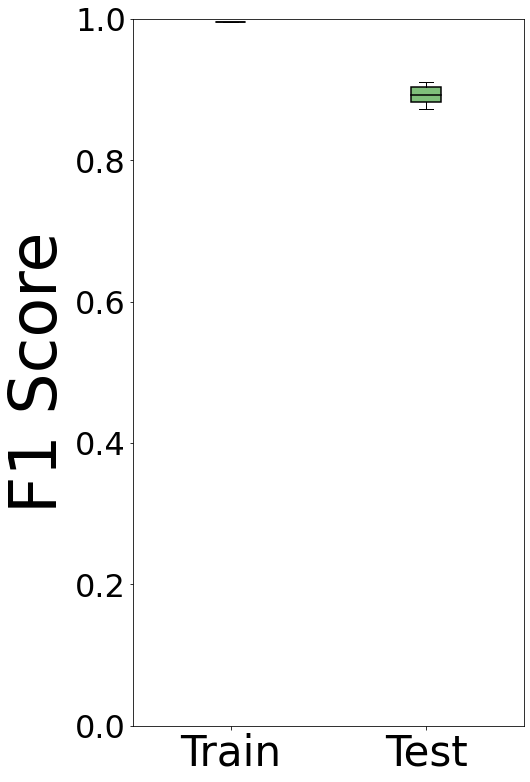

Train 0.9954337899543381 +/- 1.1102230246251565e-16
Test 0.8924504178535496 +/- 0.01195788100142732
t_20 = 25.837 ,p= 0.0


In [7]:
data = [train_f1, test_f1]
labels = ['Train', 'Test']
C.Util.boxplot(data, labels, y_lim=1, y_label='F1 Score', outputdir='/home/jiehyun.kim001/CACTAS/_EXPERIMENTS/')

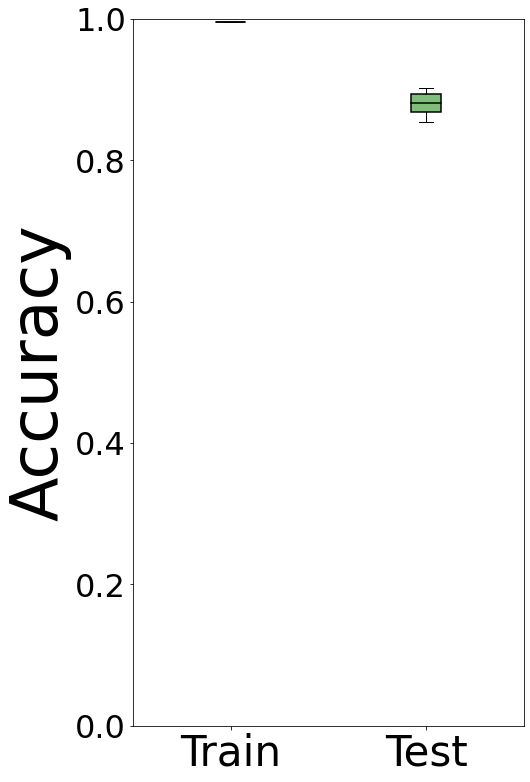

Train 0.9952718676122932 +/- 1.1102230246251565e-16
Test 0.8803105151729005 +/- 0.014898638915614213
t_20 = 23.149 ,p= 0.0


In [8]:
data = [train_acc, test_acc]
labels = ['Train', 'Test']
C.Util.boxplot(data, labels, y_lim=1, y_label='Accuracy', outputdir='/home/jiehyun.kim001/CACTAS/_EXPERIMENTS/')